### Lab01:Linear Regression

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Loading

In [12]:
PATH = 'ex1data1.txt'

data = pd.read_csv(PATH, header=None, names=['Population', 'Profit'])
print(data.head())

# 新增一列，x0(截距项）
data.insert(0, 'Ones', 1)
print(data.head())

# 将输入的x和输出的y分开
# 列数
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
Y = data.iloc[:,cols-1:cols]

# pandas中的DataFrame类型的数据转换为numpy矩阵
X = np.matrix(X.values)
Y = np.matrix(Y.values)
# theta初始化为0
Theta = np.matrix(np.array([[0], [0]]))
print(Theta)

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
   Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
[[0]
 [0]]


#### Visualize the data

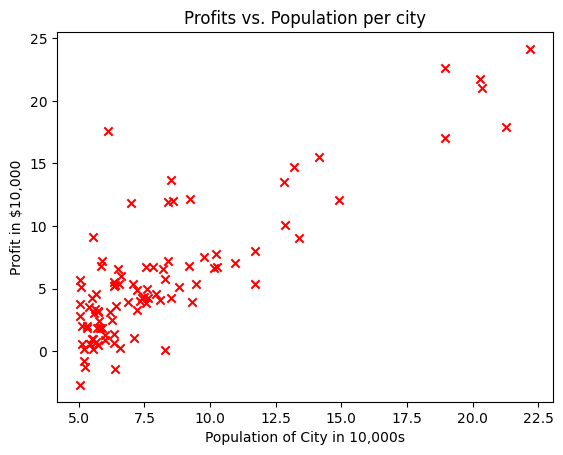

In [13]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Profits vs. Population per city')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

#### cost function

In [14]:
def cost_function(x, y, theta):
    # theta.T表示矩阵的转置
    inner = np.power(x*theta - y, 2)
    return np.sum(inner) / (2*len(x))

def gradient_descent(alpha, theta, x, y):
    theta = theta + x.T * (alpha * (y-x*theta)) / x.shape[0]
    return theta

#### 梯度下降

In [15]:
old_Theta = Theta
Alpha = 0.01
cost_list = []
iters = 1000
condition = np.matrix(np.array([[0.0001], [0.0001]]))
while True:
    cost = cost_function(X, Y, old_Theta)
    cost_list.append(cost)
    Theta = gradient_descent(alpha=Alpha, theta=old_Theta, x=X, y=Y)
    if (np.abs(Theta - old_Theta) < condition).all():
        break
    old_Theta = Theta

print(len(cost_list))

2369


#### plot

[1.000e+00 2.000e+00 3.000e+00 ... 2.367e+03 2.368e+03 2.369e+03]


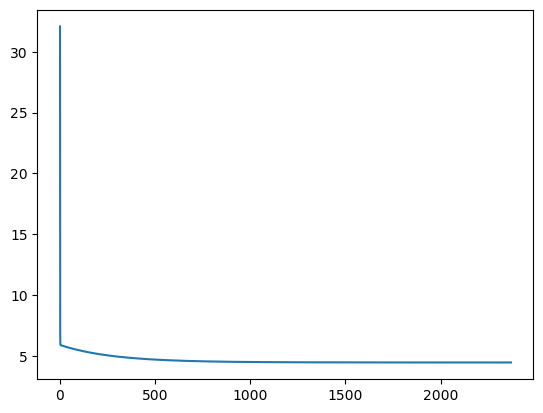

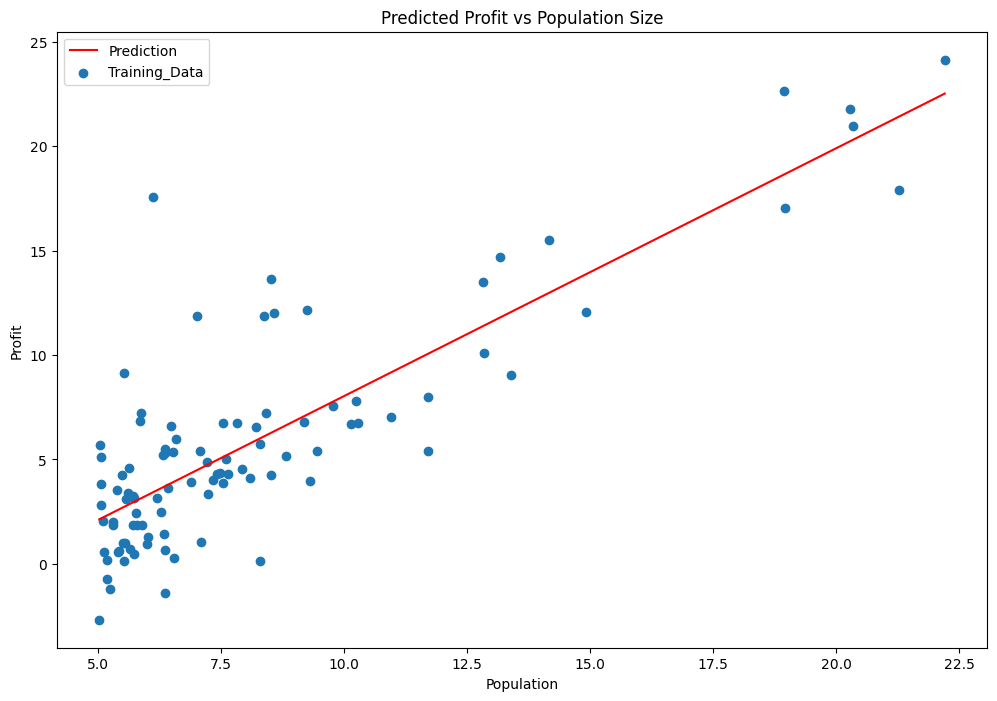

In [16]:
# 画出损失函数的图像
h_axis = np.linspace(1, len(cost_list),num=len(cost_list))
print(h_axis)
plt.plot(h_axis,cost_list)
plt.show()

# 绘制出自己拟合的直线的图像
x1 = np.linspace(data.Population.min(), data.Population.max(), 100)
y1 = Theta[0, 0] + Theta[1, 0] * x1
plt.figure(figsize=(12, 8))
plt.xlabel("Population")
plt.ylabel("Profit")
l1 = plt.plot(x1, y1, label="Prediction", color='red')
l2 = plt.scatter(data.Population, data.Profit, label="Training_Data")
plt.legend(loc='best')
plt.title('Predicted Profit vs Population Size')
plt.show()